# Lab-3

Name: Purusharth Malik

Registration No.: 2348542

### Question 1

Number of iterations taken to converge using momentum: 6


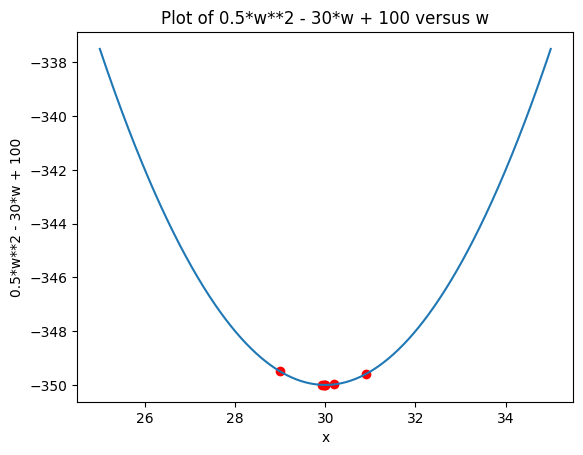

Minimum value of w: 30.003059
Minimum cost: -349.999995321259


In [84]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt

# Create the symbol
w = sp.symbols("w")

# Create the function
f_w = 0.5*w**2-30*w+100

# Prepare the function for numerical evaluations
grad_f = sp.lambdify(w, sp.diff(f_w, w))  # Use diff instead of derive_by_array

# Gradient Descent parameters
alpha = 0.1  # Learning Rate
momentum = 0.9 # Momentum
prev_grad = 0 # Value of the previous gradient
iterations = 100  # Number of iterations

# Given starting point
starting_point = 20.0
x_descent, y_descent = [], []

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = grad_f(starting_point)
    # Update x using the Gradient Descent formula while adjusting for momentum
    starting_point -= (momentum * grad + alpha * prev_grad)
    # Keeping track of the starting points for every iteration
    x_descent.append(starting_point)
    y_descent.append(f_w.subs(w, starting_point))
    # Updating the value of previous gradient
    prev_grad = grad
    # Checking for convergence
    if abs(grad) < 0.02:
        print(f"Number of iterations taken to converge using momentum: {i}")
        break

# The value of x after optimization represents the minimum of the cost function
minimum_w = starting_point
# Evaluate f_x at the minimum
minimum_cost = f_w.subs(w, minimum_w)

# Define the function for plotting
def cost_function(w):
    return 0.5*w**2-30*w+100

# Create an array of w values
w = np.linspace(25, 35, 1000)
# Evaluate f(x) for each value of x
y = cost_function(w)

# Plot f(x) versus x
plt.plot(w, y)
plt.scatter(x_descent, y_descent, c='r')

# Add labels and a title to the plot
plt.xlabel('x')
plt.ylabel(f_w)
plt.title(f'Plot of {f_w} versus w')

# Display the plot
plt.show()

# Print the result
print(f"Minimum value of w: {minimum_w}")
print(f"Minimum cost: {minimum_cost}")

### Question 2

We are choosing Kaggle's Heart Disease Dataset.

In [24]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('heart.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Since the features have different scales, we will have to perform feature scaling.

In [26]:
y = df['target']
df.drop('target', axis=1, inplace=True)

In [27]:
# Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,1.802352e-16,5.545699e-17,-7.036106e-16,-3.466062e-18,-4.159275e-17,-8.318549e-17,-4.332578e-16,-7.625337e-17,-2.426243e-16,1.854343e-16,1.819683e-17,2.530225e-16
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-1.511706e+00,-9.157554e-01,-2.148237e+00,-2.327054e+00,-4.188779e-01,-1.004049e+00,-3.397080e+00,-7.122871e-01,-9.123291e-01,-2.243675e+00,-7.319715e-01,-3.746070e+00
25%,-7.095548e-01,-1.511706e+00,-9.157554e-01,-6.632165e-01,-6.787242e-01,-4.188779e-01,-1.004049e+00,-7.442713e-01,-7.122871e-01,-9.123291e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
50%,1.726817e-01,6.615041e-01,5.593123e-02,-9.205458e-02,-1.163527e-01,-4.188779e-01,8.912549e-01,1.255019e-01,-7.122871e-01,-2.311765e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
75%,7.240794e-01,6.615041e-01,1.027618e+00,4.791073e-01,5.623715e-01,-4.188779e-01,8.912549e-01,7.343432e-01,1.403928e+00,6.202642e-01,9.954333e-01,2.386246e-01,1.089852e+00
max,2.488552e+00,6.615041e-01,1.999305e+00,3.906079e+00,6.166694e+00,2.387330e+00,2.786558e+00,2.299935e+00,1.403928e+00,4.366603e+00,9.954333e-01,3.150413e+00,1.089852e+00


The features have now been scaled. We will now split the dataset into training, validation, and testing sets.

In [37]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.33,
                                                  random_state=42,
                                                  stratify=y_train)

In [72]:
# Converting labels to vectors
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [40]:
# Looking at the shapes of the sets
X_train.shape, X_test.shape

((549, 13), (205, 13))

### Creating a model with no regularization

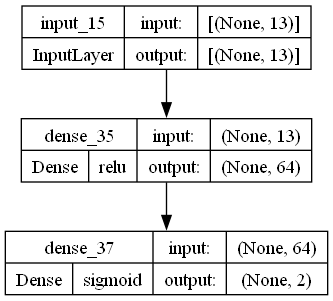

In [87]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(13,))
hidden_1 = Dense(64, activation=tf.nn.relu)(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu)(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

plot_model(model, show_layer_names=True, show_shapes=True, show_layer_activations=True)

In [100]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 0.3712 - categorical_accuracy: 0.8962 - val_loss: 0.4661 - val_categorical_accuracy: 0.8524
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3685 - categorical_accuracy: 0.8944 - val_loss: 0.4670 - val_categorical_accuracy: 0.8561
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3673 - categorical_accuracy: 0.8998 - val_loss: 0.4648 - val_categorical_accuracy: 0.8598
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3676 - categorical_accuracy: 0.8962 - val_loss: 0.4623 - val_categorical_accuracy: 0.8524
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3662 - categorical_accuracy: 0.9016 - val_loss: 0.4622 - val_categorical_accuracy: 0.8598
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3669 - categorical_accuracy: 0.9016 - val_loss: 0.4608 - val_categorical_accuracy: 0.8561
Epoch 7/1

18/18 [==============================] - 0s 5ms/step - loss: 0.3532 - categorical_accuracy: 0.9016 - val_loss: 0.4533 - val_categorical_accuracy: 0.8561
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3534 - categorical_accuracy: 0.9016 - val_loss: 0.4530 - val_categorical_accuracy: 0.8635
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3530 - categorical_accuracy: 0.9035 - val_loss: 0.4555 - val_categorical_accuracy: 0.8635
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3533 - categorical_accuracy: 0.9035 - val_loss: 0.4548 - val_categorical_accuracy: 0.8524
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3530 - categorical_accuracy: 0.9035 - val_loss: 0.4538 - val_categorical_accuracy: 0.8450
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3533 - categorical_accuracy: 0.8980 - val_loss: 0.4544 - val_categorical_accuracy: 0.8561
Epoch 56/100
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.3419 - categorical_accuracy: 0.8962 - val_loss: 0.4439 - val_categorical_accuracy: 0.8524
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3413 - categorical_accuracy: 0.9016 - val_loss: 0.4438 - val_categorical_accuracy: 0.8561


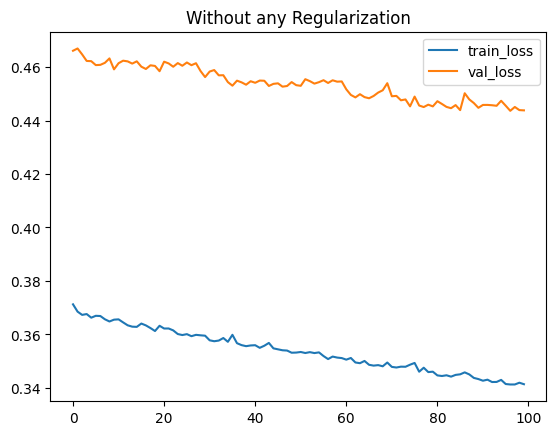

In [111]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Without any Regularization')
plt.legend()
plt.show()

Clearly, the data is overfitting the model. Let us see if regularization can help us make the model better.

### L1 Regularization

In [102]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(13,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1(0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_l1 = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
18/18 [==============================] - 1s 20ms/step - loss: 1.8355 - categorical_accuracy: 0.5719 - val_loss: 1.7199 - val_categorical_accuracy: 0.7122
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.6542 - categorical_accuracy: 0.7250 - val_loss: 1.5673 - val_categorical_accuracy: 0.7712
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 1.5072 - categorical_accuracy: 0.7760 - val_loss: 1.4369 - val_categorical_accuracy: 0.7970
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 1.3797 - categorical_accuracy: 0.7923 - val_loss: 1.3229 - val_categorical_accuracy: 0.7897
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.2651 - categorical_accuracy: 0.8015 - val_loss: 1.2187 - val_categorical_accuracy: 0.7970
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 1.1599 - categorical_accuracy: 0.8233 - val_loss: 1.1234 - val_categorical_accuracy: 0.8044
Epoch 7/1

18/18 [==============================] - 0s 5ms/step - loss: 0.4011 - categorical_accuracy: 0.8889 - val_loss: 0.4823 - val_categorical_accuracy: 0.8487
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3990 - categorical_accuracy: 0.8889 - val_loss: 0.4811 - val_categorical_accuracy: 0.8487
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3978 - categorical_accuracy: 0.8852 - val_loss: 0.4805 - val_categorical_accuracy: 0.8450
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3963 - categorical_accuracy: 0.8871 - val_loss: 0.4786 - val_categorical_accuracy: 0.8450
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3967 - categorical_accuracy: 0.8834 - val_loss: 0.4756 - val_categorical_accuracy: 0.8450
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3961 - categorical_accuracy: 0.8871 - val_loss: 0.4758 - val_categorical_accuracy: 0.8487
Epoch 56/100
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.3652 - categorical_accuracy: 0.9035 - val_loss: 0.4551 - val_categorical_accuracy: 0.8561
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3680 - categorical_accuracy: 0.8944 - val_loss: 0.4499 - val_categorical_accuracy: 0.8598


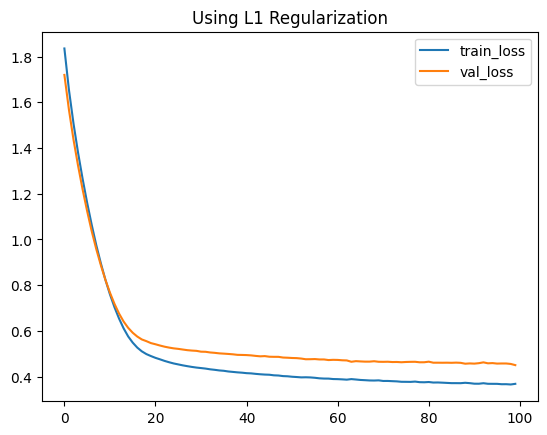

In [109]:
plt.plot(history_l1.history['loss'], label='train_loss')
plt.plot(history_l1.history['val_loss'], label='val_loss')
plt.title('Using L1 Regularization')
plt.legend()
plt.show()

### L2 Regularization

In [103]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(13,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_l2 = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 0.9199 - categorical_accuracy: 0.5246 - val_loss: 0.8367 - val_categorical_accuracy: 0.6900
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8015 - categorical_accuracy: 0.7541 - val_loss: 0.7503 - val_categorical_accuracy: 0.7823
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7179 - categorical_accuracy: 0.7996 - val_loss: 0.6887 - val_categorical_accuracy: 0.7749
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6546 - categorical_accuracy: 0.8179 - val_loss: 0.6425 - val_categorical_accuracy: 0.7970
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6056 - categorical_accuracy: 0.8397 - val_loss: 0.6086 - val_categorical_accuracy: 0.8155
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5674 - categorical_accuracy: 0.8597 - val_loss: 0.5807 - val_categorical_accuracy: 0.8229
Epoch 7/1

18/18 [==============================] - 0s 5ms/step - loss: 0.2931 - categorical_accuracy: 0.9071 - val_loss: 0.4027 - val_categorical_accuracy: 0.8598
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2918 - categorical_accuracy: 0.9107 - val_loss: 0.4030 - val_categorical_accuracy: 0.8598
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2910 - categorical_accuracy: 0.9107 - val_loss: 0.4035 - val_categorical_accuracy: 0.8598
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2896 - categorical_accuracy: 0.9107 - val_loss: 0.4024 - val_categorical_accuracy: 0.8598
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2885 - categorical_accuracy: 0.9089 - val_loss: 0.4031 - val_categorical_accuracy: 0.8598
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2875 - categorical_accuracy: 0.9107 - val_loss: 0.4031 - val_categorical_accuracy: 0.8524
Epoch 56/100
18/1

18/18 [==============================] - 0s 4ms/step - loss: 0.2463 - categorical_accuracy: 0.9253 - val_loss: 0.3577 - val_categorical_accuracy: 0.8745
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2455 - categorical_accuracy: 0.9326 - val_loss: 0.3553 - val_categorical_accuracy: 0.8745


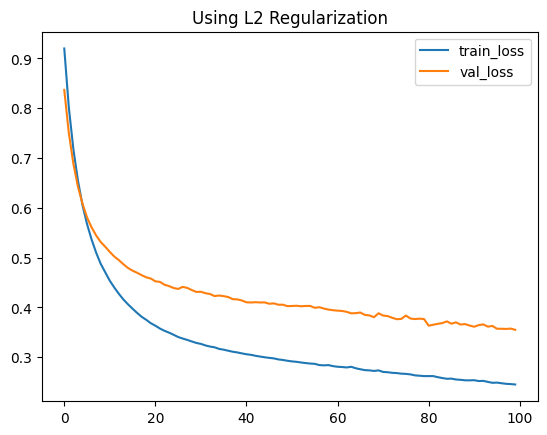

In [108]:
plt.plot(history_l2.history['loss'], label='train_loss')
plt.plot(history_l2.history['val_loss'], label='val_loss')
plt.title('Using L2 Regularization')
plt.legend()
plt.show()

### Elastic Net Regularization

In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

input_layer = Input(shape=(13,))
hidden_1 = Dense(64, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01))(input_layer)
hidden_2 = Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01))(hidden_1)
output = Dense(2, activation=tf.nn.sigmoid)(hidden_1)

model = Model(inputs=input_layer, outputs=output)

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=tf.keras.metrics.categorical_accuracy)

# Fitting the model
history_elastic = model.fit(X_train, y_train, epochs=100,
                            validation_data=(X_val, y_val))

Epoch 1/100
18/18 [==============================] - 1s 21ms/step - loss: 2.0125 - categorical_accuracy: 0.5719 - val_loss: 1.8865 - val_categorical_accuracy: 0.6236
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 1.8041 - categorical_accuracy: 0.6794 - val_loss: 1.7048 - val_categorical_accuracy: 0.6863
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 1.6281 - categorical_accuracy: 0.7486 - val_loss: 1.5472 - val_categorical_accuracy: 0.7491
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 1.4742 - categorical_accuracy: 0.7960 - val_loss: 1.4080 - val_categorical_accuracy: 0.7638
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.3384 - categorical_accuracy: 0.8106 - val_loss: 1.2836 - val_categorical_accuracy: 0.7897
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 1.2167 - categorical_accuracy: 0.8251 - val_loss: 1.1709 - val_categorical_accuracy: 0.8007
Epoch 7/1

18/18 [==============================] - 0s 5ms/step - loss: 0.4070 - categorical_accuracy: 0.8907 - val_loss: 0.4860 - val_categorical_accuracy: 0.8413
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4076 - categorical_accuracy: 0.8925 - val_loss: 0.4831 - val_categorical_accuracy: 0.8376
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4056 - categorical_accuracy: 0.8852 - val_loss: 0.4824 - val_categorical_accuracy: 0.8376
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4047 - categorical_accuracy: 0.8907 - val_loss: 0.4875 - val_categorical_accuracy: 0.8413
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4025 - categorical_accuracy: 0.8925 - val_loss: 0.4819 - val_categorical_accuracy: 0.8376
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4028 - categorical_accuracy: 0.8889 - val_loss: 0.4802 - val_categorical_accuracy: 0.8376
Epoch 56/100
18/1

18/18 [==============================] - 0s 5ms/step - loss: 0.3736 - categorical_accuracy: 0.8907 - val_loss: 0.4611 - val_categorical_accuracy: 0.8376
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3740 - categorical_accuracy: 0.8871 - val_loss: 0.4633 - val_categorical_accuracy: 0.8339


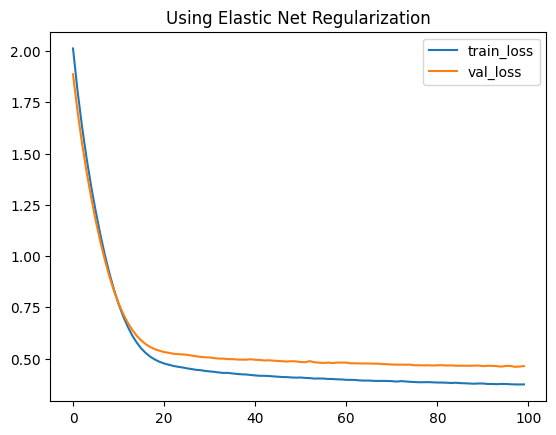

In [107]:
plt.plot(history_elastic.history['loss'], label='train_loss')
plt.plot(history_elastic.history['val_loss'], label='val_loss')
plt.title('Using Elastic Net Regularization')
plt.legend()
plt.show()

## Comparing the models

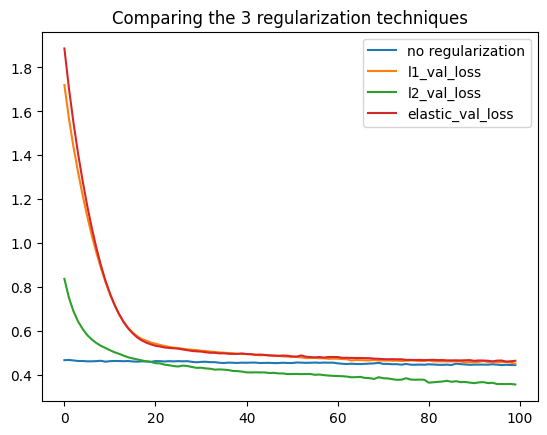

In [112]:
plt.plot(history.history['val_loss'], label='no regularization')
plt.plot(history_l1.history['val_loss'], label='l1_val_loss')
plt.plot(history_l2.history['val_loss'], label='l2_val_loss')
plt.plot(history_elastic.history['val_loss'], label='elastic_val_loss')
plt.title('Comparing the 3 regularization techniques')
plt.legend()
plt.show()

Clearly, L2 regularization does a better job at generalizing the model. This can be attributed to the fact that some features might not be contributing much to the predictions of the model.

# End